In [18]:
import pandas as pd
# !pip install openpyxl
# !pip install prophet
# !pip install plotly
# !pip install neuralprophet
import seaborn as sns
from prophet import Prophet
from prophet.diagnostics import cross_validation
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random
from datetime import datetime, timedelta

In [139]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from datetime import datetime

from pandas import Series
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import tensorflow as tf
from tensorflow import keras 

import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True) 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import statistics

#Хранение

In [ ]:
df = pd.read_excel('all-storage17-21.xlsx', index_col='Unnamed: 0')
valid = pd.read_excel('all-storage-22.xlsx', index_col='Unnamed: 0')

In [ ]:
df

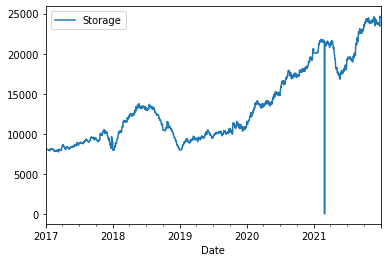

In [ ]:
df.plot(x='Date', y='Storage')

In [ ]:
valid

,Date,Storage
0,2022-01-01,24681.35
1,2022-01-02,24681.35
2,2022-01-03,24681.40
3,2022-01-04,24681.40
4,2022-01-05,24681.40
...,...,...
361,2022-12-28,0.00
362,2022-12-29,0.00
363,2022-12-30,0.00
364,2022-12-31,0.00


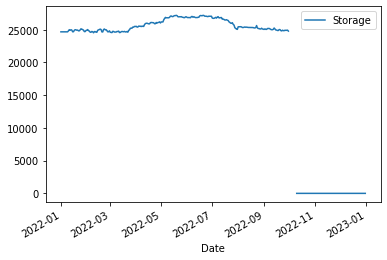

In [ ]:
valid.plot(x='Date', y='Storage')

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.




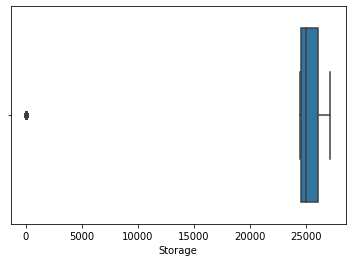

In [ ]:
sns.boxplot(valid['Storage'])

In [ ]:
valid = valid[valid['Storage']!=0]
df = df[df['Storage']!=0]

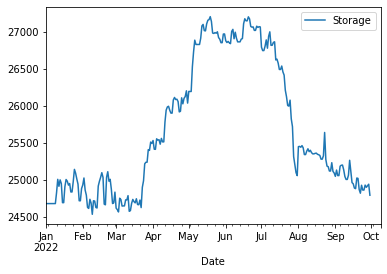

In [ ]:
valid.plot(x='Date', y='Storage')

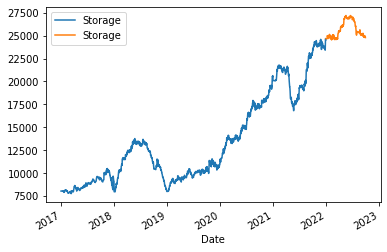

In [ ]:
ax = df.plot(x='Date', y='Storage')
valid.plot(x='Date', y='Storage', ax=ax)

smooth df by adding moving average (30 days)

In [ ]:
df['MA30'] = df['Storage'].rolling(30).mean()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [ ]:
df.dropna(inplace=True)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




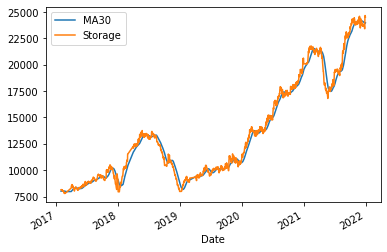

In [ ]:
ax = df.plot(x='Date', y='MA30')
df.plot(x='Date', y='Storage', ax=ax)

In [ ]:
df = pd.concat([df, valid]) # включаем 22 в обучение

In [ ]:
def split_df(df, test_size):
    return df[:int(len(df)*(1-test_size))], df[-int(len(df)*test_size):]

In [ ]:
df = df[['Date', 'Storage']].rename(columns={"Date": 'ds', 'Storage': 'y'})

In [ ]:
df["is_weekend"] = df['ds'].dt.dayofweek > 4 # выходной 0/1
df["season"] = df['ds'].dt.month%12 // 3 + 1 #winter summer etc
print(len(df))

1988


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_k1gazm4/g36na4fb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_k1gazm4/8rzo1fy3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79702', 'data', 'file=/tmp/tmp_k1gazm4/g36na4fb.json', 'init=/tmp/tmp_k1gazm4/8rzo1fy3.json', 'output', 'file=/tmp/tmp_k1gazm4/prophet_modelrrfwn9_v/prophet_model-20221022233027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:30:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:30:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


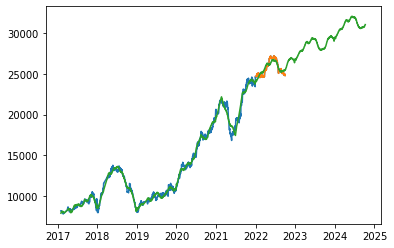

In [ ]:
m = Prophet(changepoint_prior_scale=0.8)
m.add_country_holidays(country_name='RU')
m.add_regressor('is_weekend')
m.add_regressor('season')
m.fit(df)


future = m.make_future_dataframe(periods=365*2) #(до 23)
future["is_weekend"] = future['ds'].dt.dayofweek > 4
future["season"] = future['ds'].dt.month%12 // 3 + 1

forecast = m.predict(future)
plt.plot(df['ds'], df['y'])
plt.plot(valid['Date'], valid['Storage'])
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

#Обработка

In [ ]:
df = pd.read_excel('all-process17-21.xlsx')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%Y-%m-%d %H:%M:%S') # там часы почему-то эксель дал, убираем их

In [ ]:
df = df.dropna()
# df = df[df['Process'] > 0] # УДАЛЯЕМ 0 ИЗ ДАТАСЕТА

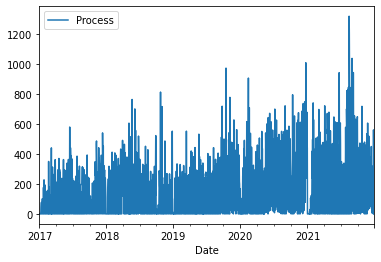

In [ ]:
df.plot(x='Date', y='Process')

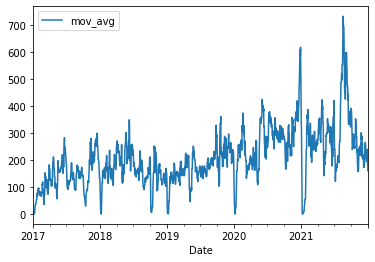

In [ ]:
df['mov_avg'] = df['Process'].rolling(7).mean() # берем 7 дней вместо них вставляем их среднее
df.plot(x='Date', y='mov_avg')

In [ ]:
valid = pd.read_excel('process22.xlsx')

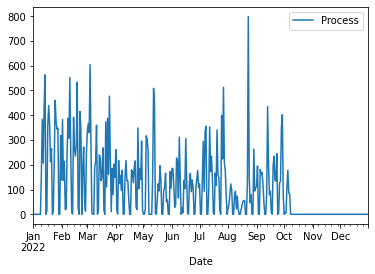

In [ ]:
valid.plot(x='Date', y='Process')

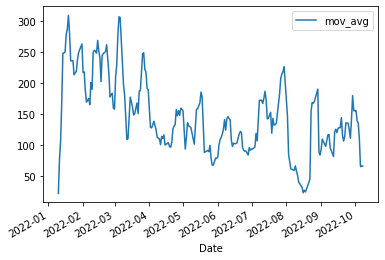

In [ ]:
valid['mov_avg'] = valid['Process'].rolling(7).mean()
valid = valid[valid['Process']>0]
valid.plot(x='Date', y='mov_avg')

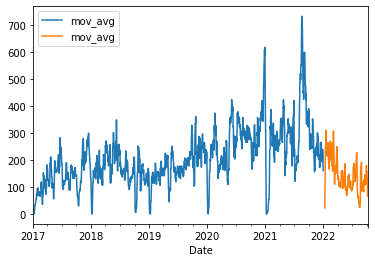

In [ ]:
ax = df.plot(x='Date', y='mov_avg')
valid.plot(x='Date', y='mov_avg', ax=ax)

In [ ]:
df = pd.concat([df, valid]) # включаем 22 год в обучение

In [ ]:
df = df[['Date', 'mov_avg']].rename(columns={"Date": 'ds', 'mov_avg': 'y'})

In [ ]:
df["is_weekend"] = df['ds'].dt.dayofweek > 4
df["season"] = df['ds'].dt.month%12 // 3 + 1
df['floor'] = 0 # минимальное ограничение для тренда чтобы он не скатывался в отрицательные (но все равно скатывается я хз)
df['cap'] = 3000 # макс ограничение


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_k1gazm4/zd9yb38v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_k1gazm4/w5vbmfpv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60695', 'data', 'file=/tmp/tmp_k1gazm4/zd9yb38v.json', 'init=/tmp/tmp_k1gazm4/w5vbmfpv.json', 'output', 'file=/tmp/tmp_k1gazm4/prophet_modelrjgokjct/prophet_model-20221022233605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:36:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:36:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


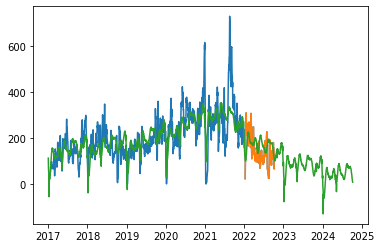

In [ ]:
m = Prophet(growth='logistic') # logistic требует как раз cap и floor. Там есть еще гиперпараметры, вот с ними надо поиграться 
m.add_country_holidays(country_name='RU')
# m.add_regressor('is_weekend')
# m.add_regressor('season')
m.fit(df)


future = m.make_future_dataframe(periods=365*2)
# future["is_weekend"] = future['ds'].dt.dayofweek > 4
# future["season"] = future['ds'].dt.month%12 // 3 + 1
future['floor'] = 0 # minimum
future['cap'] = 3000 # maximum

forecast = m.predict(future)
plt.plot(df['ds'], df['y'])
plt.plot(valid['Date'], valid['mov_avg'])
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

# Отдельно по складам


# Создание серий для нейронки

In [401]:
df = pd.read_excel('/content/drive/My Drive/data/series_sklad.xlsx', index_col='Date', parse_dates = ['Date'])
df = df.dropna()

In [402]:
df["Moscow"]

Date
2017-01-01     4727.21
2017-01-02     4727.21
2017-01-03     4727.21
2017-01-04     4727.21
2017-01-05     4727.21
                ...   
2021-12-27    13160.35
2021-12-28    13442.44
2021-12-29    13461.20
2021-12-30    13467.45
2021-12-31    13448.36
Name: Moscow, Length: 1826, dtype: float64

In [403]:
data_mn = 0

In [404]:
for i in range(20000):
  while True:
    day = str(random.randint(1, 31))
    month = str(random.randint(1, 12))
    year = str(random.randint(2017, 2021))
    try:
      date_s = pd.to_datetime(year+"-"+ month +"-"+ day, format='%Y-%m-%d') 
    except Exception:
      try:
        date_s = pd.to_datetime(year+"-"+ month +"-"+ "30", format='%Y-%m-%d') 
      except Exception:
        date_s = pd.to_datetime(year+"-"+ month +"-"+ "28", format='%Y-%m-%d')
    if date_s < pd.to_datetime("2021"+"-"+ "06" +"-"+ "30", format='%Y-%m-%d'):
      break
  if i <=7000:
    getr = df["Moscow"]
  elif i <=14000:
    getr = df["Sev_Zap"]
  else:
    getr = df["Ural"]
  sers = getr[date_s <= getr.index]
  sers = sers[sers.index < date_s + timedelta(weeks = 4 * 6)].T
  ind = range(168)

  if type(data_mn) == int:
    data_mn = pd.DataFrame([sers.tolist()], columns=list(ind))
  else:
    data_mn = pd.concat([data_mn, pd.DataFrame([sers.tolist()], columns=list(ind), index=[i])])

In [405]:
data_mn = data_mn.astype('float32')
data_mn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Columns: 168 entries, 0 to 167
dtypes: float32(168)
memory usage: 13.0 MB


# Обучение нейронки

In [406]:
max_steps = 168

master_series = []

for i in range(len(data_mn)):
    if (max(data_mn.iloc[i, 0:max_steps]) == 0 ):
        continue
      
    myseries = np.array(data_mn.iloc[i][0:max_steps])
    master_series.append(myseries)
    
master_series = np.array(master_series) 
master_series = master_series[..., np.newaxis].astype(np.float32)

master_series.shape

(20000, 168, 1)

In [407]:
master_series_values = master_series.reshape(-1,1)

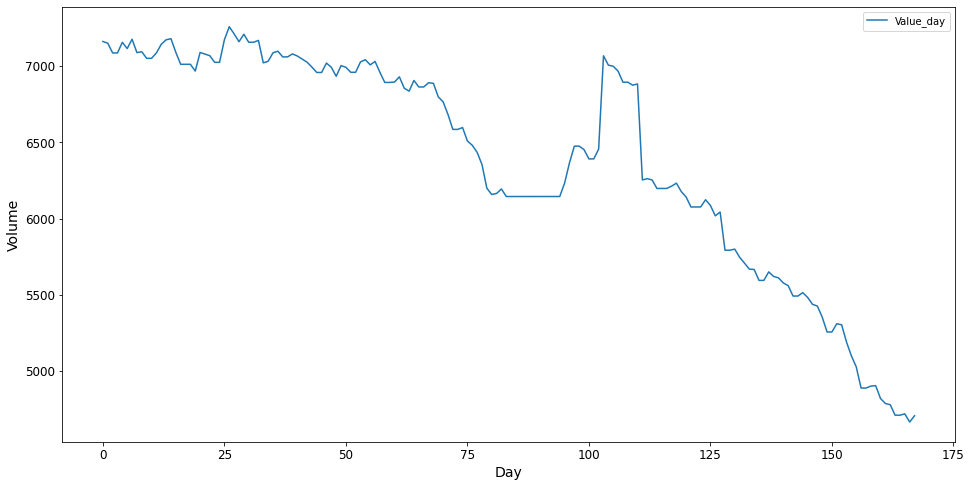

In [408]:
plt.figure(figsize=(16,8))
sample = 456

plt.plot(master_series[sample,:], label = 'Value_day')
plt.xlabel("Day")
plt.ylabel("Volume")
plt.legend(loc = 'best')

In [409]:
master_series.shape[0]

20000

In [410]:
log_master_series = []


for i in range(master_series.shape[0]):
  temp_series = np.array(np.log(master_series[i][0:] + 1))
  log_master_series.append(temp_series)
    
log_master_series = np.array(log_master_series) 

print(log_master_series[0,0:10])

log_master_series.shape

[[9.140775]
 [9.142407]
 [9.129401]
 [9.129483]
 [9.123942]
 [9.130037]
 [9.11582 ]
 [9.111401]
 [9.117051]
 [9.119906]]


(20000, 168, 1)

In [413]:
np.random.seed(42)

n_steps = 167

predicted_day = n_steps + 1

X_train, y_train = log_master_series[:13000, :n_steps], log_master_series[:13000, n_steps]
X_valid, y_valid = log_master_series[13000:17000, :n_steps], log_master_series[13000:17000, n_steps]
X_test, y_test = log_master_series[17000:20000, :n_steps], log_master_series[17000:20000, n_steps]

In [415]:
X_train.shape, y_train.shape

((13000, 167, 1), (13000, 1))

In [416]:
X_valid.shape, y_valid.shape

((4000, 167, 1), (4000, 1))

In [417]:
X_train_values = X_train.reshape(-1, 1)

print(X_train_values.shape)

print(min(X_train_values))
print(max(X_train_values))

(2171000, 1)
[0.]
[9.534099]


In [418]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train_values)

y_train_normalized = scaler.transform(y_train)


X_valid_values = X_valid.reshape(-1, 1)
X_valid_normalized = scaler.transform(X_valid_values)

y_valid_normalized = scaler.transform(y_valid)


X_test_values = X_test.reshape(-1, 1)
X_test_normalized = scaler.transform(X_test_values)

y_test_normalized = scaler.transform(y_test)


X_train = X_train_normalized.reshape(X_train.shape[0] , X_train.shape[1] , X_train.shape[2])
X_valid = X_valid_normalized.reshape(X_valid.shape[0] ,X_valid.shape[1] , X_valid.shape[2])
X_test = X_test_normalized.reshape(X_test.shape[0] ,X_test.shape[1] , X_test.shape[2])

y_train = y_train_normalized.reshape(y_train.shape[0], y_train.shape[1] )
y_valid = y_valid_normalized.reshape(y_valid.shape[0], y_valid.shape[1] )
y_test =  y_test_normalized.reshape(y_test.shape[0], y_test.shape[1] )

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((13000, 167, 1),
 (13000, 1),
 (4000, 167, 1),
 (4000, 1),
 (3000, 167, 1),
 (3000, 1))

In [419]:
def reverse_transform(arr):
    arr = arr.reshape(-1,1)
    arr_inv_normal = scaler.inverse_transform(arr)
    arr_reverse = np.exp(arr_inv_normal ) - 1
    return (arr_reverse)

In [421]:
np.random.seed(42)
tf.random.set_seed(42)

lin_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[n_steps, 1]),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(lr=0.0001)

lin_model.compile(loss="mse", optimizer=optimizer)
lin_model.summary()

history_lin = lin_model.fit(X_train, y_train, epochs=50,  batch_size=32,
                    validation_data=(X_valid, y_valid))

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 167)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 168       
                                                                 
Total params: 168
Trainable params: 168
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0074 - val_loss: 0.0016
Epoch 2/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 3/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 4/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 5/50
407/407 [==============================]

In [422]:
linear_mse = round(lin_model.evaluate(X_valid, y_valid), 7)
linear_mse

125/125 [==============================] - 0s 1ms/step - loss: 0.0013


0.0012582

In [423]:
np.random.seed(42)
tf.random.set_seed(42)

simp_rnn_model = keras.models.Sequential([
        keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

simp_rnn_model.summary()

optimizer = keras.optimizers.Adam(lr=0.0001)

simp_rnn_model.compile(loss="mse", optimizer=optimizer)

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001, verbose=1)

history_srnn = simp_rnn_model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
407/407 [==============================] - 9s 20ms/step - loss: 0.0027 - val_loss: 0.0049
Epoch 2/50
407/407 [==============================] - 8s 20ms/step - loss: 0.0026 - val_loss: 0.0049
Epoch 3/50
407/407 [==============================] - 9s 21ms/step - loss: 0.0026 - val_loss: 0.0049
Epoch 4/50
407/407 [==============================] - 8s 20ms/step - loss: 0.0026 - val_loss: 0.0049
Epoch 5/50
407/407 [==============================] - 8s 20ms/step - loss: 0.0026 - val_loss: 0.0049
Epoch 6/50
407/407 [==============================] - 8s 20ms/step - loss: 0.0026 

In [424]:
simp_rnn_mse = round(simp_rnn_model.evaluate(X_valid, y_valid), 7)
simp_rnn_mse

125/125 [==============================] - 1s 7ms/step - loss: 0.0047


0.004681

In [425]:
np.random.seed(42)
tf.random.set_seed(42)


d_rnn_model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])


optimizer = keras.optimizers.Adam(lr=0.0001)

d_rnn_model.compile(loss="mse", optimizer=optimizer)

d_rnn_model.summary()
print()

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)
mc = keras.callbacks.ModelCheckpoint('best_model_drnn.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


history_drnn = d_rnn_model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_valid, y_valid), callbacks=[early_stopping, mc])

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, None, 20)          440       
                                                                 
 dropout_5 (Dropout)         (None, None, 20)          0         
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 20)                820       
                                                                 
 dense_16 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________

Epoch 1/50
407/407 [==============================] - ETA: 0s - loss: 0.1127
Epoch 1: val_loss improved from inf to 0.01415, saving model to best_model_drnn.h5
407/407 [=============

In [426]:
round(d_rnn_model.evaluate(X_valid, y_valid), 7)

125/125 [==============================] - 2s 16ms/step - loss: 6.3207e-04


0.0006321

In [427]:
np.random.seed(42)
tf.random.set_seed(42)

lstm_model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.LSTM(20),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(lr=0.0005)

lstm_model.compile(loss="mse", optimizer=optimizer)
lstm_model.summary()

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)
mc = keras.callbacks.ModelCheckpoint('best_model_lstm.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


history_lstm = lstm_model.fit(X_train, y_train, epochs=80, batch_size=32,
                    validation_data=(X_valid, y_valid), callbacks=[early_stopping, mc])

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, None, 20)          1760      
                                                                 
 lstm_19 (LSTM)              (None, None, 20)          3280      
                                                                 
 lstm_20 (LSTM)              (None, 20)                3280      
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
407/407 [==============================] - ETA: 0s - loss: 0.0252
Epoch 1: val_loss improved from inf to 0.00067, saving model to best_model_lstm.h5
407/407 [==============

In [428]:
round(lstm_model.evaluate(X_valid, y_valid), 7)

125/125 [==============================] - 5s 38ms/step - loss: 5.7952e-04


0.0005795

In [429]:
print(lin_model.evaluate(X_valid, y_valid))
print(simp_rnn_model.evaluate(X_valid, y_valid))
print(d_rnn_model.evaluate(X_valid, y_valid))
print(lstm_model.evaluate(X_valid, y_valid))

125/125 [==============================] - 0s 1ms/step - loss: 0.0013
0.0012582438066601753
125/125 [==============================] - 1s 7ms/step - loss: 0.0047
0.004680996760725975
125/125 [==============================] - 2s 16ms/step - loss: 6.3207e-04
0.000632072682492435
125/125 [==============================] - 5s 38ms/step - loss: 5.7952e-04
0.0005795157630927861


In [430]:
y_pred_lstm = lstm_model.predict(X_valid)
y_pred_lin = lin_model.predict(X_valid)
y_pred_srnn = simp_rnn_model.predict(X_valid)
y_pred_drnn = d_rnn_model.predict(X_valid)

125/125 [==============================] - 2s 16ms/step


In [ ]:
reverse_transform(y_pred_lin)

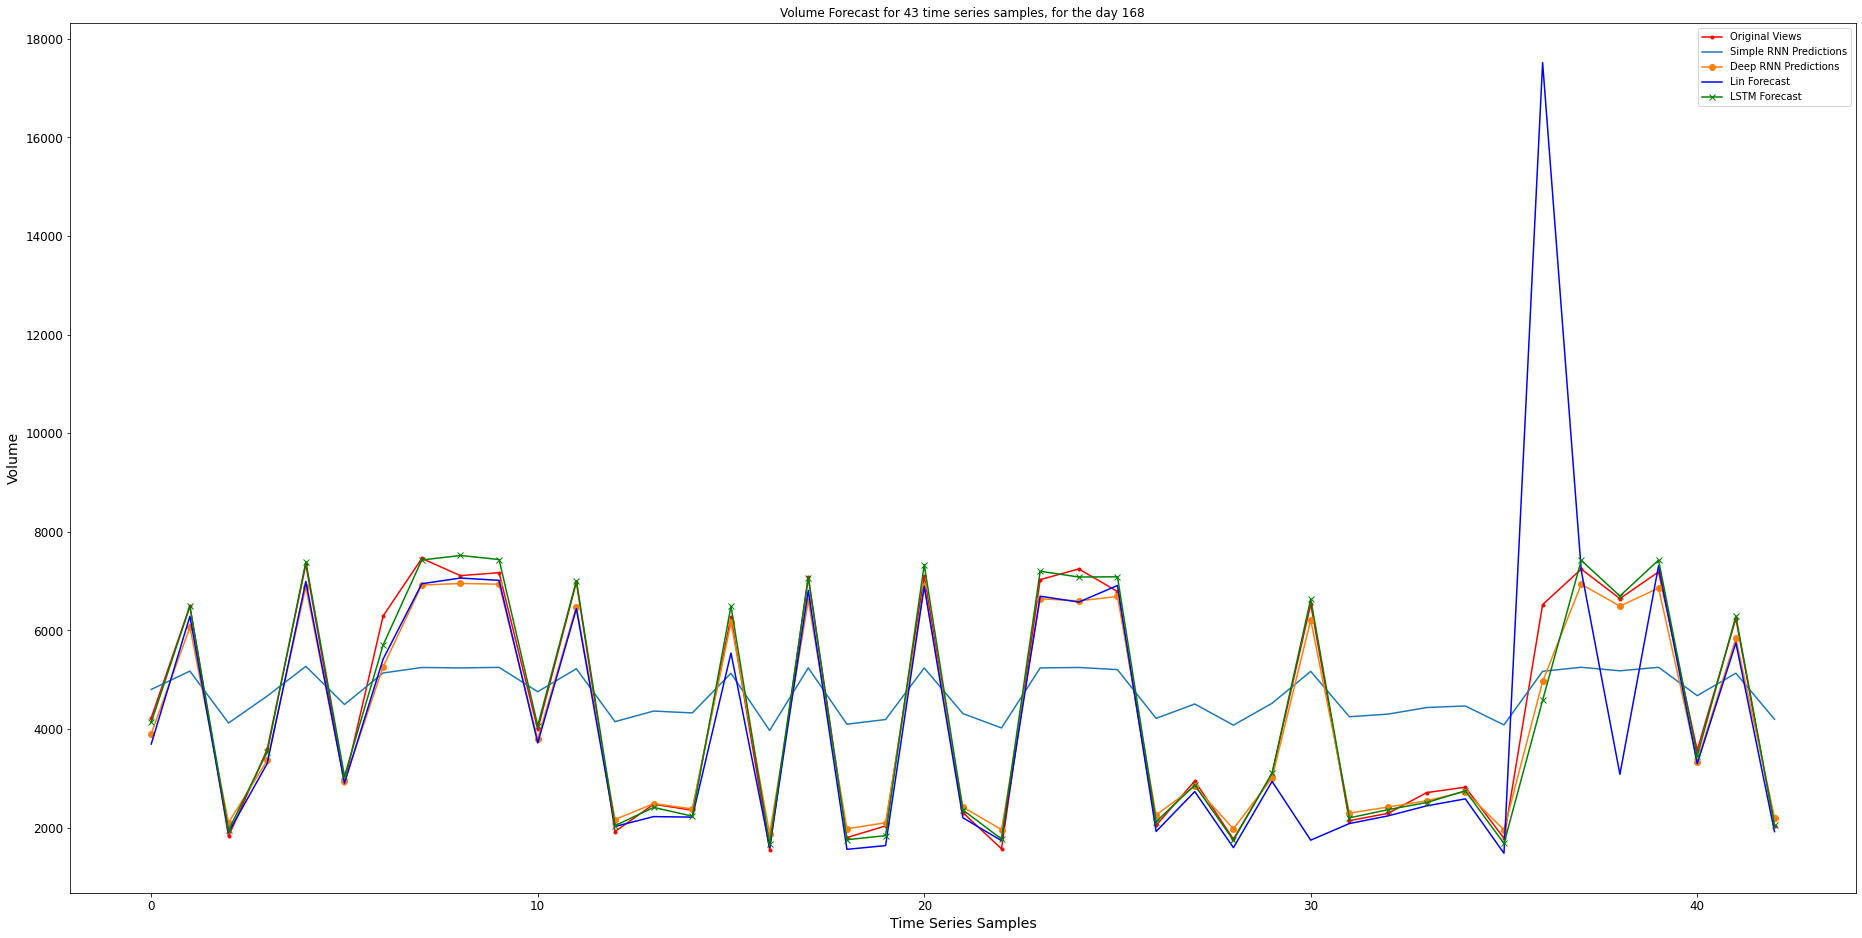

In [434]:
plt.figure(figsize=(32,16))

num_samples = 43

plt.plot(reverse_transform(y_valid[0:num_samples]), 'r.-', label = 'Original Views')
plt.plot(reverse_transform(y_pred_srnn[0:num_samples]), label = 'Simple RNN Predictions')
plt.plot(reverse_transform(y_pred_drnn[0:num_samples]), 'o-', label = 'Deep RNN Predictions')
plt.plot(reverse_transform(y_pred_lin[0:num_samples]), 'b-', label = 'Lin Forecast')
plt.plot(reverse_transform(y_pred_lstm[0:num_samples]), 'gx-', label = 'LSTM Forecast')

plt.title('Volume Forecast for ' + str(num_samples) + ' time series samples, for the day ' + str(predicted_day))
plt.xlabel("Time Series Samples")
plt.ylabel("Volume")
plt.legend(loc = 'best')

In [435]:
log_master_series.shape
num_days_predicted = 31

In [437]:
np.random.seed(42)

series = log_master_series[:, : n_steps + num_days_predicted, :]
series.shape

y_train_mult = series[:13000, -num_days_predicted:, 0]

y_valid_mult = series[13000:17000, -num_days_predicted:, 0]

y_test_mult =  series[17000:20000, -num_days_predicted:, 0]

print(y_train_mult.shape)

(13000, 31)


In [438]:
y_train_normalized = scaler.transform(y_train_mult.reshape(-1,1))
y_train_mult = y_train_normalized.reshape(y_train_mult.shape[0], y_train_mult.shape[1])
print(y_train_mult.max())
print(y_train_mult.min())
print()

y_valid_normalized = scaler.transform(y_valid_mult.reshape(-1,1))
y_valid_mult = y_valid_normalized.reshape(y_valid_mult.shape[0], y_valid_mult.shape[1])
print(y_valid_mult.max())
print(y_valid_mult.min())
print()


y_test_normalized = scaler.transform(y_test_mult.reshape(-1,1))
y_test_mult = y_test_normalized.reshape(y_test_mult.shape[0], y_test_mult.shape[1])
print(y_test_mult.max())
print(y_test_mult.min())
print()

1.0
0.0

0.9414944
0.0

0.8733215
0.0



In [440]:
np.random.seed(42)
tf.random.set_seed(42)

lstm_mult_model1 = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.Dropout(rate=0.2),
    keras.layers.LSTM(20),
    keras.layers.Dense(num_days_predicted)
])

optimizer = keras.optimizers.Adam(lr=0.0005)
lstm_mult_model1.compile(loss="mse", optimizer = optimizer)

lstm_mult_model1.summary()
print()

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)
mc = keras.callbacks.ModelCheckpoint('best_model_mult_lstm.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


history_mult_lstm1 = lstm_mult_model1.fit(X_train, y_train_mult, epochs=80, batch_size=128,
                    validation_data=(X_valid, y_valid_mult), callbacks=[early_stopping, mc])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, None, 20)          1760      
                                                                 
 lstm_25 (LSTM)              (None, None, 20)          3280      
                                                                 
 dropout_7 (Dropout)         (None, None, 20)          0         
                                                                 
 lstm_26 (LSTM)              (None, 20)                3280      
                                                                 
 dense_19 (Dense)            (None, 31)                651       
                                                                 
Total params: 8,971
Trainable params: 8,971
Non-trainable params: 0
_________________________________________________________________

Epoch 1/80
102/102 [==============================

In [441]:
lstm_mult_model1 = keras.models.load_model('best_model_mult_lstm.h5')

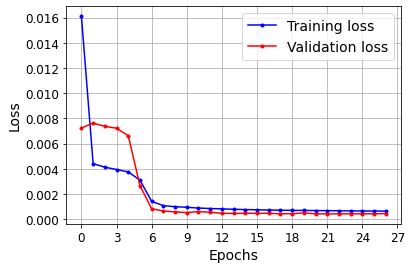

In [444]:
plot_learning_curves(history_mult_lstm1.history["loss"][1:], history_mult_lstm1.history["val_loss"][1:])
plt.show()

In [442]:
lstm_mult_model1.evaluate(X_valid, y_valid_mult)

125/125 [==============================] - 6s 38ms/step - loss: 4.2351e-04


0.00042351236334070563

In [386]:
y_pred_mult_lstm = lstm_mult_model1.predict(X_valid)

32/32 [==============================] - 2s 15ms/step


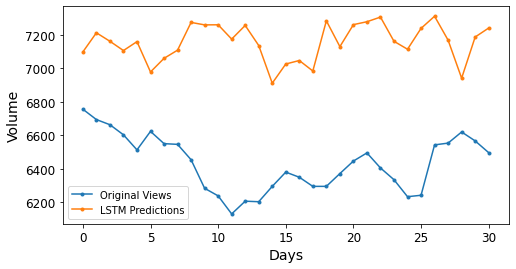

In [445]:
sample_tested = 1
plt.figure(figsize=(8,4))


plt.plot(reverse_transform(y_valid_mult[sample_tested]),  ".-", label = 'Original Views')
plt.plot(reverse_transform(y_pred_mult_lstm[sample_tested]),  ".-", label = 'LSTM Predictions')

plt.xlabel("Days")
plt.ylabel("Volume")
plt.legend(loc = 'best')